# **Assignment 3**

**Bank Client Data:**

1 - age (numeric)

2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")

3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")

5 - default: has credit in default? (categorical: "no","yes","unknown")

6 - housing: has housing loan? (categorical: "no","yes","unknown")

7 - loan: has personal loan? (categorical: "no","yes","unknown")

**related with the last contact of the current campaign:**

8 - contact: contact communication type (categorical: "cellular","telephone")

9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**other attributes:**

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

**social and economic context attributes**

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

**Output variable (desired target):**

21 - y - has the client subscribed a term deposit? (binary: "yes","no")

**Import library yang diperlukan**

In [1]:
## Basic Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Configure libraries
warnings.filterwarnings('ignore')

**Load Data**

In [2]:
df = pd.read_csv('bank-additional-full.csv', sep = ';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
df.shape

(41188, 21)

**Clean Data**

In [6]:
# Cek duplikat data
df.duplicated().any()

True

In [7]:
# Lihat duplikat data
df[df.duplicated(keep = False)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no


In [8]:
# remove duplicates rows
df.drop_duplicates(inplace = True)

df.shape

(41176, 21)

In [9]:
# Remove 'unkown values'
# copy df
df_bank =df.copy()
for col in df_bank.columns:
    df_bank = df_bank.loc[~(df[col]=='unknown')]
    
df_bank.shape

(30478, 21)

## Preprocessing Dataset

Target pada dataset yaitu kolom y dengan nilai 'yes' and 'no'. Akan sangat berguna jika kita menambah kolom dengan hasil yang sama dalam bentuk biner 0 dan 1.

In [10]:
df_bank['target'] = np.where(df_bank['y'].isin(['yes']), 1, 0)

In [11]:
df_bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
count,30478.000000,30478.000000,30478.000000,30478.000000,30478.000000,30478.000000,30478.000000,30478.000000,30478.000000,30478.000000,30478.000000
mean,39.029694,259.513124,2.521721,956.318295,0.194337,-0.071425,93.523376,-40.602579,3.459976,5160.813967,0.126583
std,10.332746,261.746393,2.720495,201.404843,0.522862,1.610306,0.585366,4.788790,1.777215,75.158267,0.332511
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,31.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.313000,5099.100000,0.000000
50%,37.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.856000,5191.000000,0.000000
75%,45.000000,321.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,95.000000,4918.000000,43.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


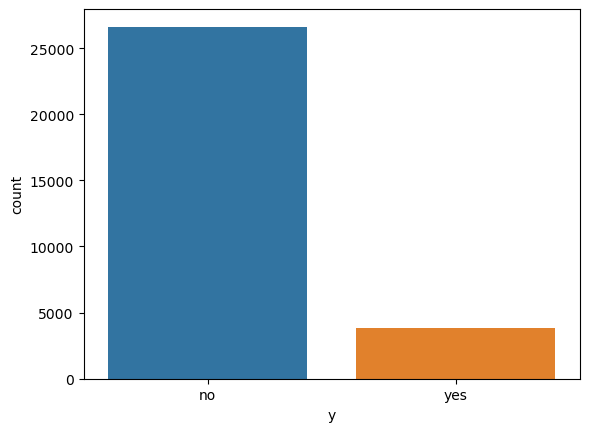

In [14]:
# Proporsi kolom y
sns.countplot(x='y', data=df_bank)
plt.show()

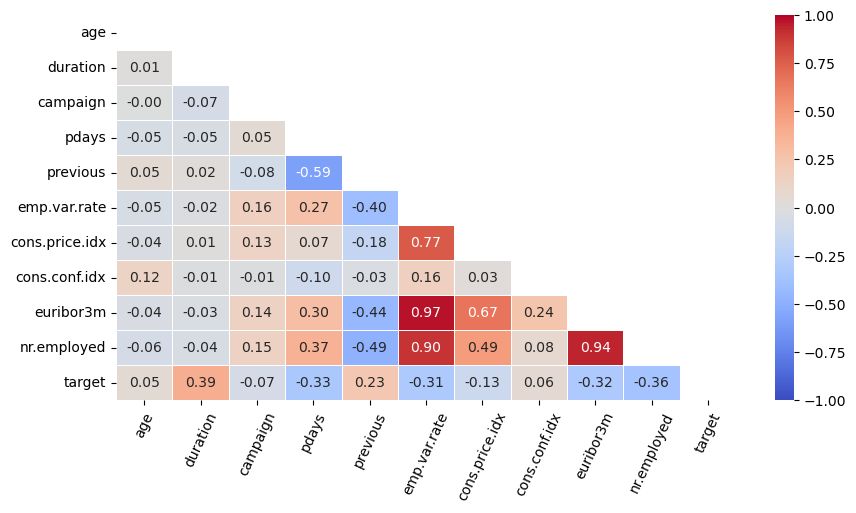

In [12]:
# buat plot untuk mengetahui korelasi antar variabel numerik
fig, ax = plt.subplots(figsize=(10, 5))

df_corr = df_bank.corr(method='pearson')
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data=df_corr, vmin=-1, vmax=1, mask=mask, 
            cmap=sns.color_palette('coolwarm', as_cmap=True),
            annot=True, fmt='.2f', linewidths=.5, ax=ax)

ax.set_xticklabels(ax.get_xticklabels(), rotation=65);

Dari hasil visualisasi di atas, akan diambil beberapa variabel numerik yang meiliki nilai korelasi terbesar yaitu: 

- duration

- campaign

- pdays

- previous

- emp.var.rate

- euribor3m

- nr.employed

In [15]:
# kelompokkan kolom type category yang diperlukan
col_cat = ['job', 'month', 'contact', 'poutcome']

In [16]:
# ubah beberapa kolom dg type data category 
x_cat_dum = pd.get_dummies(df_bank[col_cat], drop_first = True)

In [17]:
x_cat_dum

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,contact_telephone,poutcome_nonexistent,poutcome_success
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,1,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
41184,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
41185,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
41186,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [18]:
# Menggabungkan education: basic menjadi satu kesatuan dan illiterate termasuk unknown
df_bank['education'] = np.where(df_bank['education']=='basic.4y', 'Basic', df_bank['education'])
df_bank['education'] = np.where(df_bank['education']=='basic.6y', 'Basic', df_bank['education'])
df_bank['education'] = np.where(df_bank['education']=='basic.9y', 'Basic', df_bank['education'])
df_bank['education'] = np.where(df_bank['education']=='illiterate', 'unknown', df_bank['education'])

Kolom education terdiri dari beberapa tingkatan, sehingga perlu dilakukan preprocessing dengan ordinal encorder.

In [19]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

df_bank['education'] = encoder.fit_transform(df_bank[['education']])

In [20]:
df_all = pd.concat([df_bank[['education', 'duration','pdays', 'campaign', 'previous', 'emp.var.rate', 'euribor3m','nr.employed']], x_cat_dum], axis=1, join='inner')

In [21]:
df_all.head()

,education,duration,pdays,campaign,previous,emp.var.rate,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,contact_telephone,poutcome_nonexistent,poutcome_success
0,0.0,261,999,1,0,1.1,4.857,5191.0,0,0,...,0,0,0,1,0,0,0,1,1,0
2,1.0,226,999,1,0,1.1,4.857,5191.0,0,0,...,0,0,0,1,0,0,0,1,1,0
3,0.0,151,999,1,0,1.1,4.857,5191.0,0,0,...,0,0,0,1,0,0,0,1,1,0
4,1.0,307,999,1,0,1.1,4.857,5191.0,0,0,...,0,0,0,1,0,0,0,1,1,0
6,2.0,139,999,1,0,1.1,4.857,5191.0,0,0,...,0,0,0,1,0,0,0,1,1,0


**Split and Train Data**

In [22]:
# Definisikan variabel x dan y
X_var = df_all
Y_var = df_bank['target']

In [23]:
# Split Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_var, Y_var, test_size=0.3, random_state=0)

## Logistic Regression

**Standardization**

Kita akan menstandardisasikan data input yang digunakan untuk logistic regression. Standardization ini diperlukan untuk meningkatkan kinerja algoritme kita.

In [24]:
# Import standardscaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)

**Create model and train it**

In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

**Standardization X_test**

Karena kita telah menstandardkan X_train, maka model yang diperoleh bergantung pada scaled data, jadi X_test harus diskalakan juga dengan cara yang sama.

In [26]:
# menskalakan x_test
x_test = scaler.transform(X_test)

**Predicted Output**

In [30]:
# predicted outputs
y_pred = model.predict(x_test)

**Evaluasi Model**

In [31]:
# Akurasi train set
model.score(x_train, y_train)

0.8997375082028687

In [32]:
# Akurasi test set
model.score(x_test, y_test)

0.9017935258092739

## Confusion Matrix

In [57]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test, y_pred, labels=[1, 0])

array([[ 479,  673],
       [ 225, 7767]], dtype=int64)

In [34]:
# Hasil confusion matrix
TP = 479
FN = 673
FP = 225
TN = 7767

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7992
           1       0.68      0.42      0.52      1152

    accuracy                           0.90      9144
   macro avg       0.80      0.69      0.73      9144
weighted avg       0.89      0.90      0.89      9144



## Visualization 1 : Heatmap Confusion Matrix

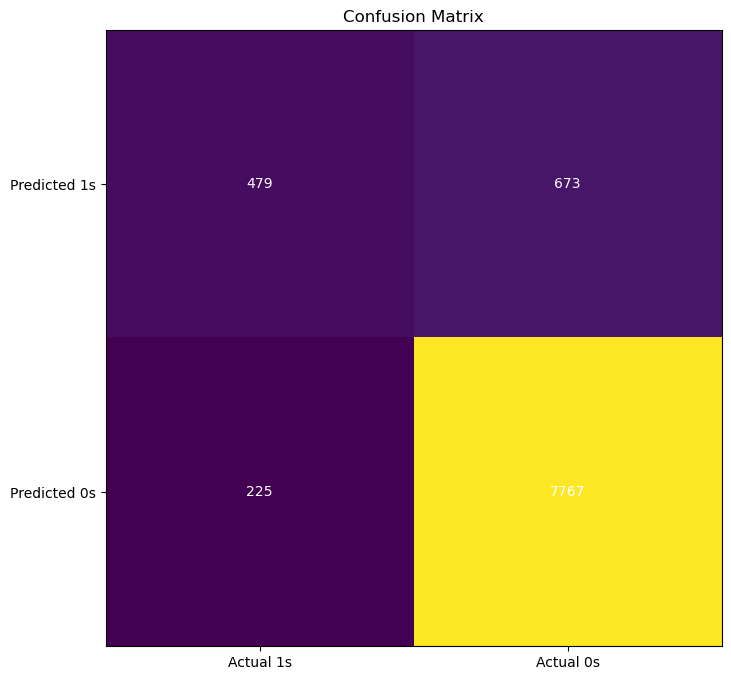

In [56]:
# Visualisasi Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.xaxis.set(ticks=(0,1), ticklabels=('Actual 1s', 'Actual 0s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Predicted 1s', 'Predicted 0s'))
ax.set_ylim(1.5, -0.5)
plt.title('Confusion Matrix')
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

**Interpretasi:**

Berdasarkan hasil visualisasi di atas dapat diihat bahwa dari 704 klien yang bersedia berlangganan, model memprediksi terdapat 225 klien yang diprediksi tidak bersedia berlangganan, dan dari 8440 klien yang tidak bersedia berlanggan, model memprediksi ada 673 klien yang diprediksi bersedia berlanggan.

## K-Nearest Neighbor (KNN)

Disini saya akan menggunakan data yang telah distandardkan sebelumnya yaitu x_train, dan x_test.

In [63]:
# Import KNN model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

# train the model using the training sets
knn.fit(x_train, y_train)

# Predict the response for the dataset
y_pred_knn = knn.predict(x_test)

In [64]:
# Model evaluasi
from sklearn import metrics

# Model accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_knn))

Accuracy: 0.8873578302712161


## Support Vector

Disini saya akan menggunakan data yang telah distandardkan sebelumnya yaitu x_train, dan x_test.

In [65]:
# Import svm model
from sklearn import svm

# Create a svm Classifer
clf = svm.SVC(kernel='linear') #linear kernel

# Train the model using training sets
clf.fit(x_train, y_train)

# Predict the response for test datasets
y_pred_svm = clf.predict(x_test)

#### Evaluating the Model

In [66]:
# Model accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_svm))

Accuracy: 0.8933727034120735


## Decision Tree

In [68]:
# Import Decision Tree
from sklearn.tree import DecisionTreeClassifier

Karena decision tree merupakan model yang tidak memerlukan feature scaling, disini saya akan menggunakan data yang belum distandardkan yaitu X_train dan X_test.

In [69]:
# Create decision tree classifer object
clf = DecisionTreeClassifier(max_depth=3, random_state=10)

# Train Desicion Tree Classifer
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred_tree = clf.predict(X_test)

# Model accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_tree))

Accuracy: 0.8972003499562554


### Visualization 2: Decision Tree

In [72]:
!conda install python-graphviz -y

Retrieving notices: ...working... done
Solving environment: ...working... done

## Package Plan ##

  environment location: F:\mbkm\anaconda3

  added / updated specs:
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cairo-1.16.0               |       he04af86_2         1.5 MB
    expat-2.4.9                |       h6c2663c_0         207 KB
    fribidi-1.0.10             |       h62dcd97_0          63 KB
    getopt-win32-0.1           |       h2bbff1b_0          19 KB
    glib-2.69.1                |       h5dc1a3c_1         1.6 MB
    graphite2-1.3.14           |       hd77b12b_1          91 KB
    graphviz-2.50.0            |       hdb8b0d4_0         903 KB
    gts-0.7.6                  |       h63ab5a1_3         181 KB
    harfbuzz-4.3.0             |       hb646838_1         855 KB
    libffi-3.4.2               |       hd77b12b_6         109 KB
    libgd-2.3.

In [74]:
!pip install pydotplus

     ------------------------------------ 278.7/278.7 kB 857.6 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24554 sha256=f18ef4d58c1c979d762498ef8f9df99734e85a1cf839b1b9dc363b15c7f06174
  Stored in directory: c:\users\acer\appdata\local\pip\cache\wheels\89\e5\de\6966007cf223872eedfbebbe0e074534e72e9128c8fd4b55eb
Successfully built pydotplus


In [77]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21334 entries, 32888 to 4404
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   education             21334 non-null  float64
 1   duration              21334 non-null  int64  
 2   pdays                 21334 non-null  int64  
 3   campaign              21334 non-null  int64  
 4   previous              21334 non-null  int64  
 5   emp.var.rate          21334 non-null  float64
 6   euribor3m             21334 non-null  float64
 7   nr.employed           21334 non-null  float64
 8   job_blue-collar       21334 non-null  uint8  
 9   job_entrepreneur      21334 non-null  uint8  
 10  job_housemaid         21334 non-null  uint8  
 11  job_management        21334 non-null  uint8  
 12  job_retired           21334 non-null  uint8  
 13  job_self-employed     21334 non-null  uint8  
 14  job_services          21334 non-null  uint8  
 15  job_student     

In [78]:
# Definisikan nama kolom dalam X_train ke dalam feature_cols
feature_cols = ['education', 'duration', 'pdays', 'campaign', 'previous', 'emp.var.rate',
               'euribor3m', 'nr.employed', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
               'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student',
               'job_technician', 'job_unemployed', 'month_aug', 'month_dec', 'month_jul', 'month_mar',
               'month_may', 'month_nov', 'month_oct', 'month_sep', 'contact_telephone', 'poutcome_nonexistent',
               'poutcome_success']

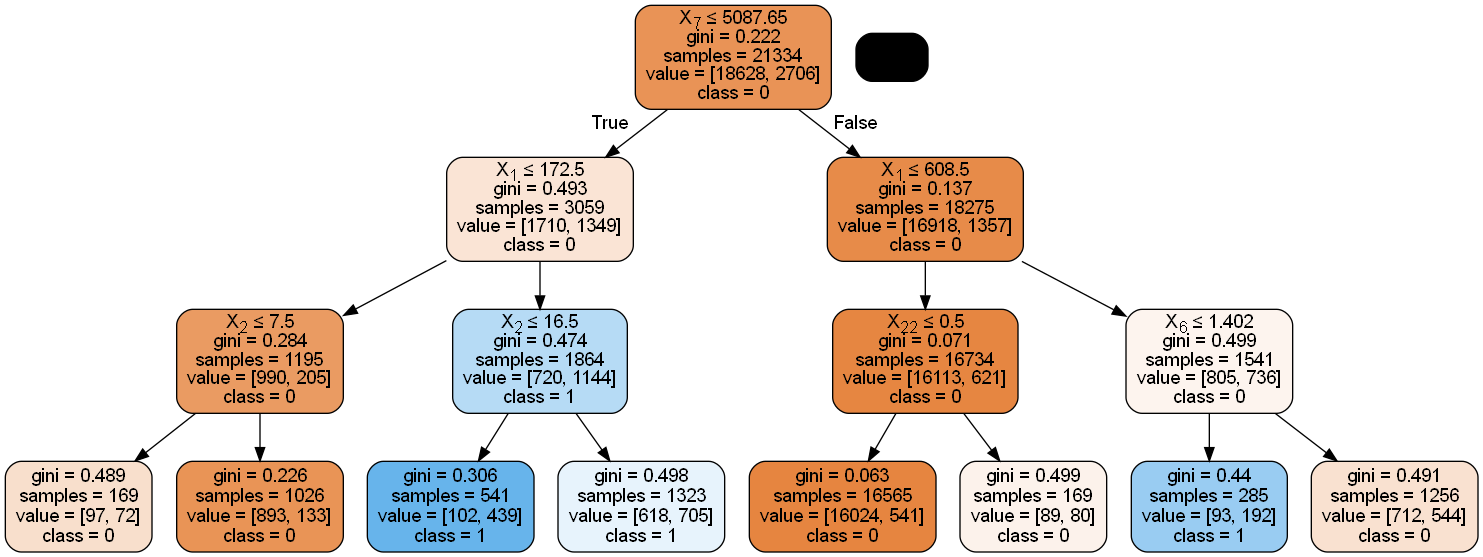

In [83]:
import sklearn.tree as tree
import pydotplus
from sklearn import metrics
from sklearn.externals.six import StringIO
from IPython.display import Image

dot_data = StringIO()
tree.export_graphviz(clf,
                    out_file=dot_data,
                    class_names=['0', '1'],
                    filled=True,
                    rounded=True,
                    special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

**Interpretasi:**

Dari Visualisasi Decision Tree diatas dapat dilihat terdapat 1 root node dengan  6 internal node dan 8 leaf. Dari setiap node terdapat informasi, informasi dalam root node merupakan kriteria splitting, seperti X7 < 5087.65  yang artinya disini kita memanfaatkan feature indeks ke-7 dengan syarat apakah nilainya lebih kecil dari 5087.65. Hal berikutnya yang tercantum dalam decision tree adalah gini sebesar 0.222, gini disini merupakan gini impurity sebelum splitting, kemudian juga terdapat keterangan sampel sebesar 21334 yang artinya jumlah data sebelum proses splitting adalah sebsar 21334, terakhir terdapat value sebesar 18628 dan 2706. 

## Random Forest

Karena Random Forest merupakan model yang tidak memerlukan feature scaling, disini saya akan menggunakan data yang belum distandardkan yaitu X_train dan X_test.

In [93]:
# Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

# Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets
clf.fit(X_train, y_train)

y_pred_rf = clf.predict(X_test)

# Model accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_rf))

Accuracy: 0.9015748031496063


## Naive Bayes

In [94]:
# Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Classifier
gnb = GaussianNB()

# Train the model using training sets
gnb.fit(X_train, y_train)

y_pred_nb = gnb.predict(X_test)

In [ ]:
# Model accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_nb))

### Perbandingan Akurasi Score dari masing-masing Model

In [96]:
print('LogisticRegression:', metrics.accuracy_score(y_test, y_pred))
print('KNN:', metrics.accuracy_score(y_test, y_pred_knn))
print('SVM:', metrics.accuracy_score(y_test, y_pred_svm))
print('Decision Tree:', metrics.accuracy_score(y_test, y_pred_tree))
print('Random Forest:', metrics.accuracy_score(y_test, y_pred_rf))
print('Naive Bayes:', metrics.accuracy_score(y_test, y_pred_nb))

LogisticRegression: 0.9023403324584427
KNN: 0.8873578302712161
SVM: 0.8933727034120735
Decision Tree: 0.8972003499562554
Random Forest: 0.9015748031496063
Naive Bayes: 0.8641732283464567


**Analisis Algoritma:**

Beberapa algoritma yang telah dijalankan saya lebih menyukai algoritma untuk membuat model Logistic Regression, alasannya adalah selain mudah dipahami, logistic regression juga mudah dianalisis melalui confusion matriks, selain itu juga dari 6 model di atas, logistic regression memiliki akurasi skor tertinggi.